In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


Bad key text.latex.preview in file /Users/jamisonproctor/opt/anaconda3/envs/MLG/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/jamisonproctor/opt/anaconda3/envs/MLG/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/jamisonproctor/opt/anaconda3/envs/MLG/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('save

In [2]:
df = pd.read_csv('../data/athlete_events.csv')

In [5]:
from tabulate import tabulate

def visualize(df, small=False):
    print(f"Data Frame has {df.shape[0]} rows and {df.shape[1]} rows\n")
    print("These are the column names:")

    information = []
    counter = 0

    for column in df.columns:
        information.append([f"{counter}: {column}", f"{df[column].nunique()} unique values", f"{df[column].isna().sum()} are NaN", f"Type: {df[column].dtype}"])
        counter += 1

    print(tabulate(information, headers=['Column', 'Values', 'NaN', 'Type']))

    print("\n")

    if small == False:
      counter = 0
      for column in df.columns:
          print(f"{counter}: {column} has {df[column].nunique()} unique values. {df[column].isna().sum()} are NaN.")
          print(f"It's {df[column].dtype}. These are the unique values:")
          print(f"{df[column].unique()}\n")
          counter += 1

In [6]:
visualize(df)

Data Frame has 271116 rows and 15 rows

These are the column names:
Column      Values                NaN             Type
----------  --------------------  --------------  -------------
0: ID       135571 unique values  0 are NaN       Type: int64
1: Name     134732 unique values  0 are NaN       Type: object
2: Sex      2 unique values       0 are NaN       Type: object
3: Age      74 unique values      9474 are NaN    Type: float64
4: Height   95 unique values      60171 are NaN   Type: float64
5: Weight   220 unique values     62875 are NaN   Type: float64
6: Team     1184 unique values    0 are NaN       Type: object
7: NOC      230 unique values     0 are NaN       Type: object
8: Games    51 unique values      0 are NaN       Type: object
9: Year     35 unique values      0 are NaN       Type: int64
10: Season  2 unique values       0 are NaN       Type: object
11: City    42 unique values      0 are NaN       Type: object
12: Sport   66 unique values      0 are NaN       Type: 

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df_post_USSR = df[df['Year'] >= 1992]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
185324,93169,Marie-Jos Juliana Prec (Hontas-),F,24.0,180.0,60.0,France,FRA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
53220,27317,Dimitrios Deligiannis,M,30.0,176.0,85.0,Greece,GRE,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Mixed Three Person Keelboat,NaN
53210,27313,Patrick Delice,M,24.0,184.0,77.0,Trinidad and Tobago,TTO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
53209,27313,Patrick Delice,M,24.0,184.0,77.0,Trinidad and Tobago,TTO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53816,27601,Aleksey Alekseyevich Denisenko,M,22.0,185.0,68.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Silver
132753,66825,Nicole Broch Larsen,F,23.0,179.0,75.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN
240761,120623,Carlos Tobalina Aspirez,M,31.0,188.0,120.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Shot Put,NaN
114748,58108,Fabian Raphael Kauter,M,30.0,181.0,83.0,Switzerland,SUI,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's epee, Team",NaN


In [13]:
df_post_USSR.sort_values(by='Year', inplace=True)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

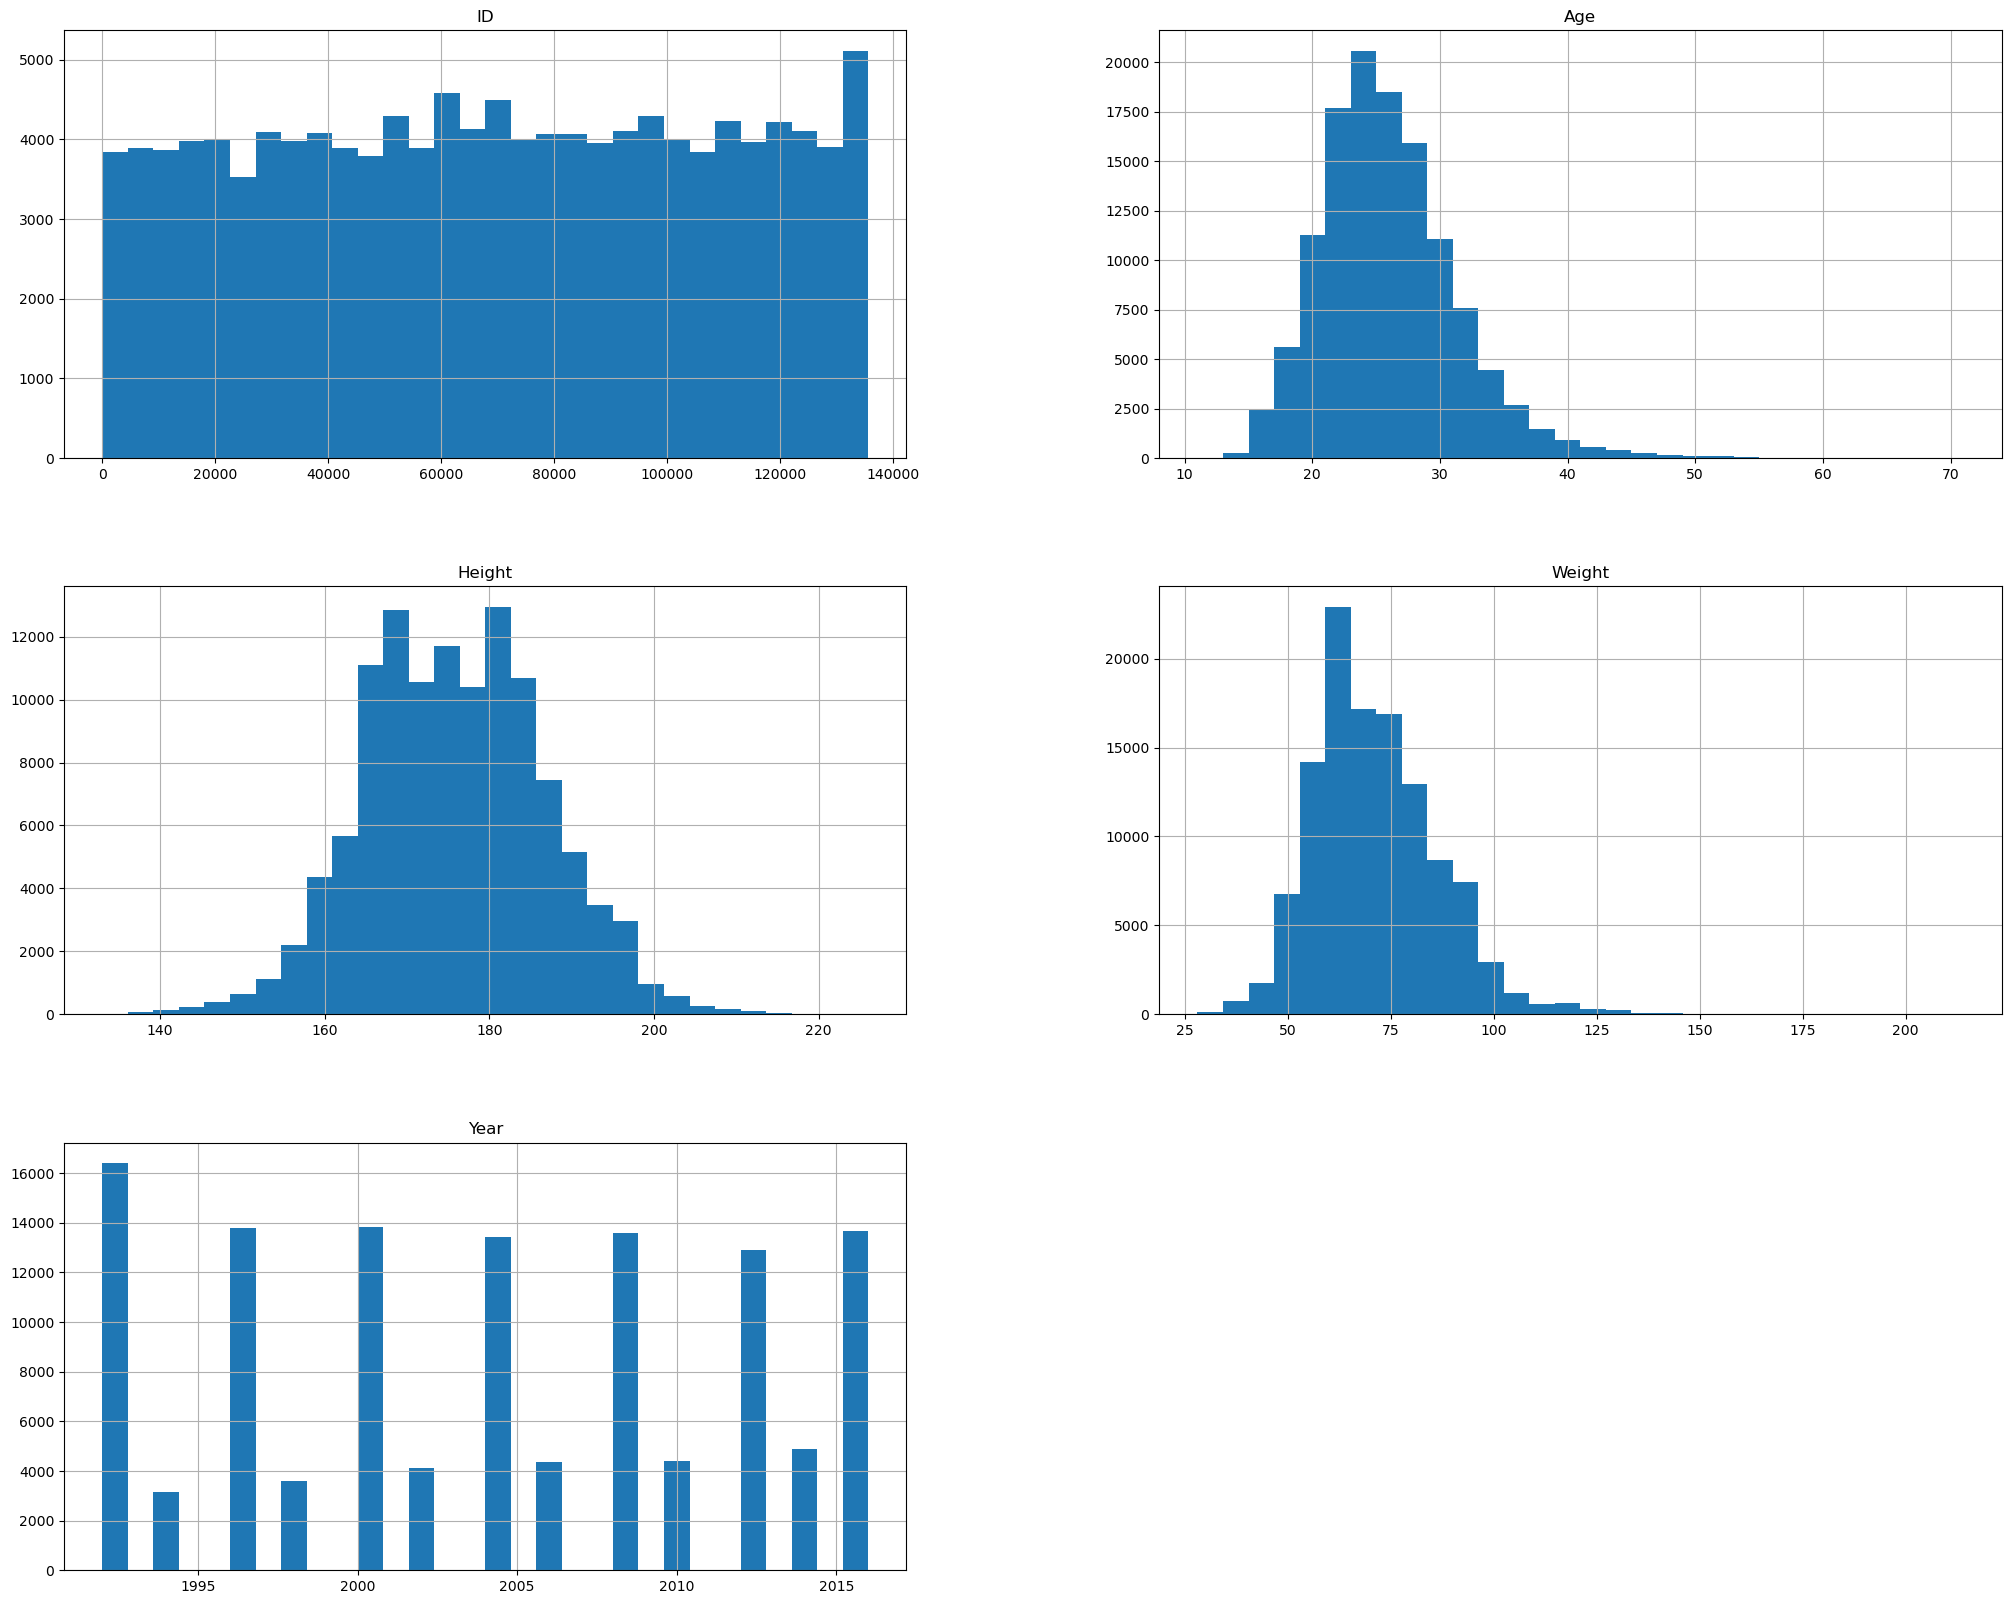

In [65]:
df_post_USSR.hist(figsize=(25, 20), bins=30)

<AxesSubplot:>

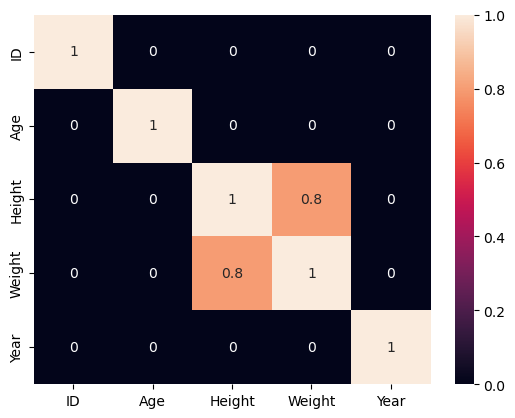

In [19]:
r = df_post_USSR.corr()
r[abs(r) <= 0.75] = 0

sns.heatmap(r, annot=True)

In [56]:
df_by_year = df_post_USSR.groupby('Year').agg('count').sort_values('Year', ascending=False)

<AxesSubplot:>

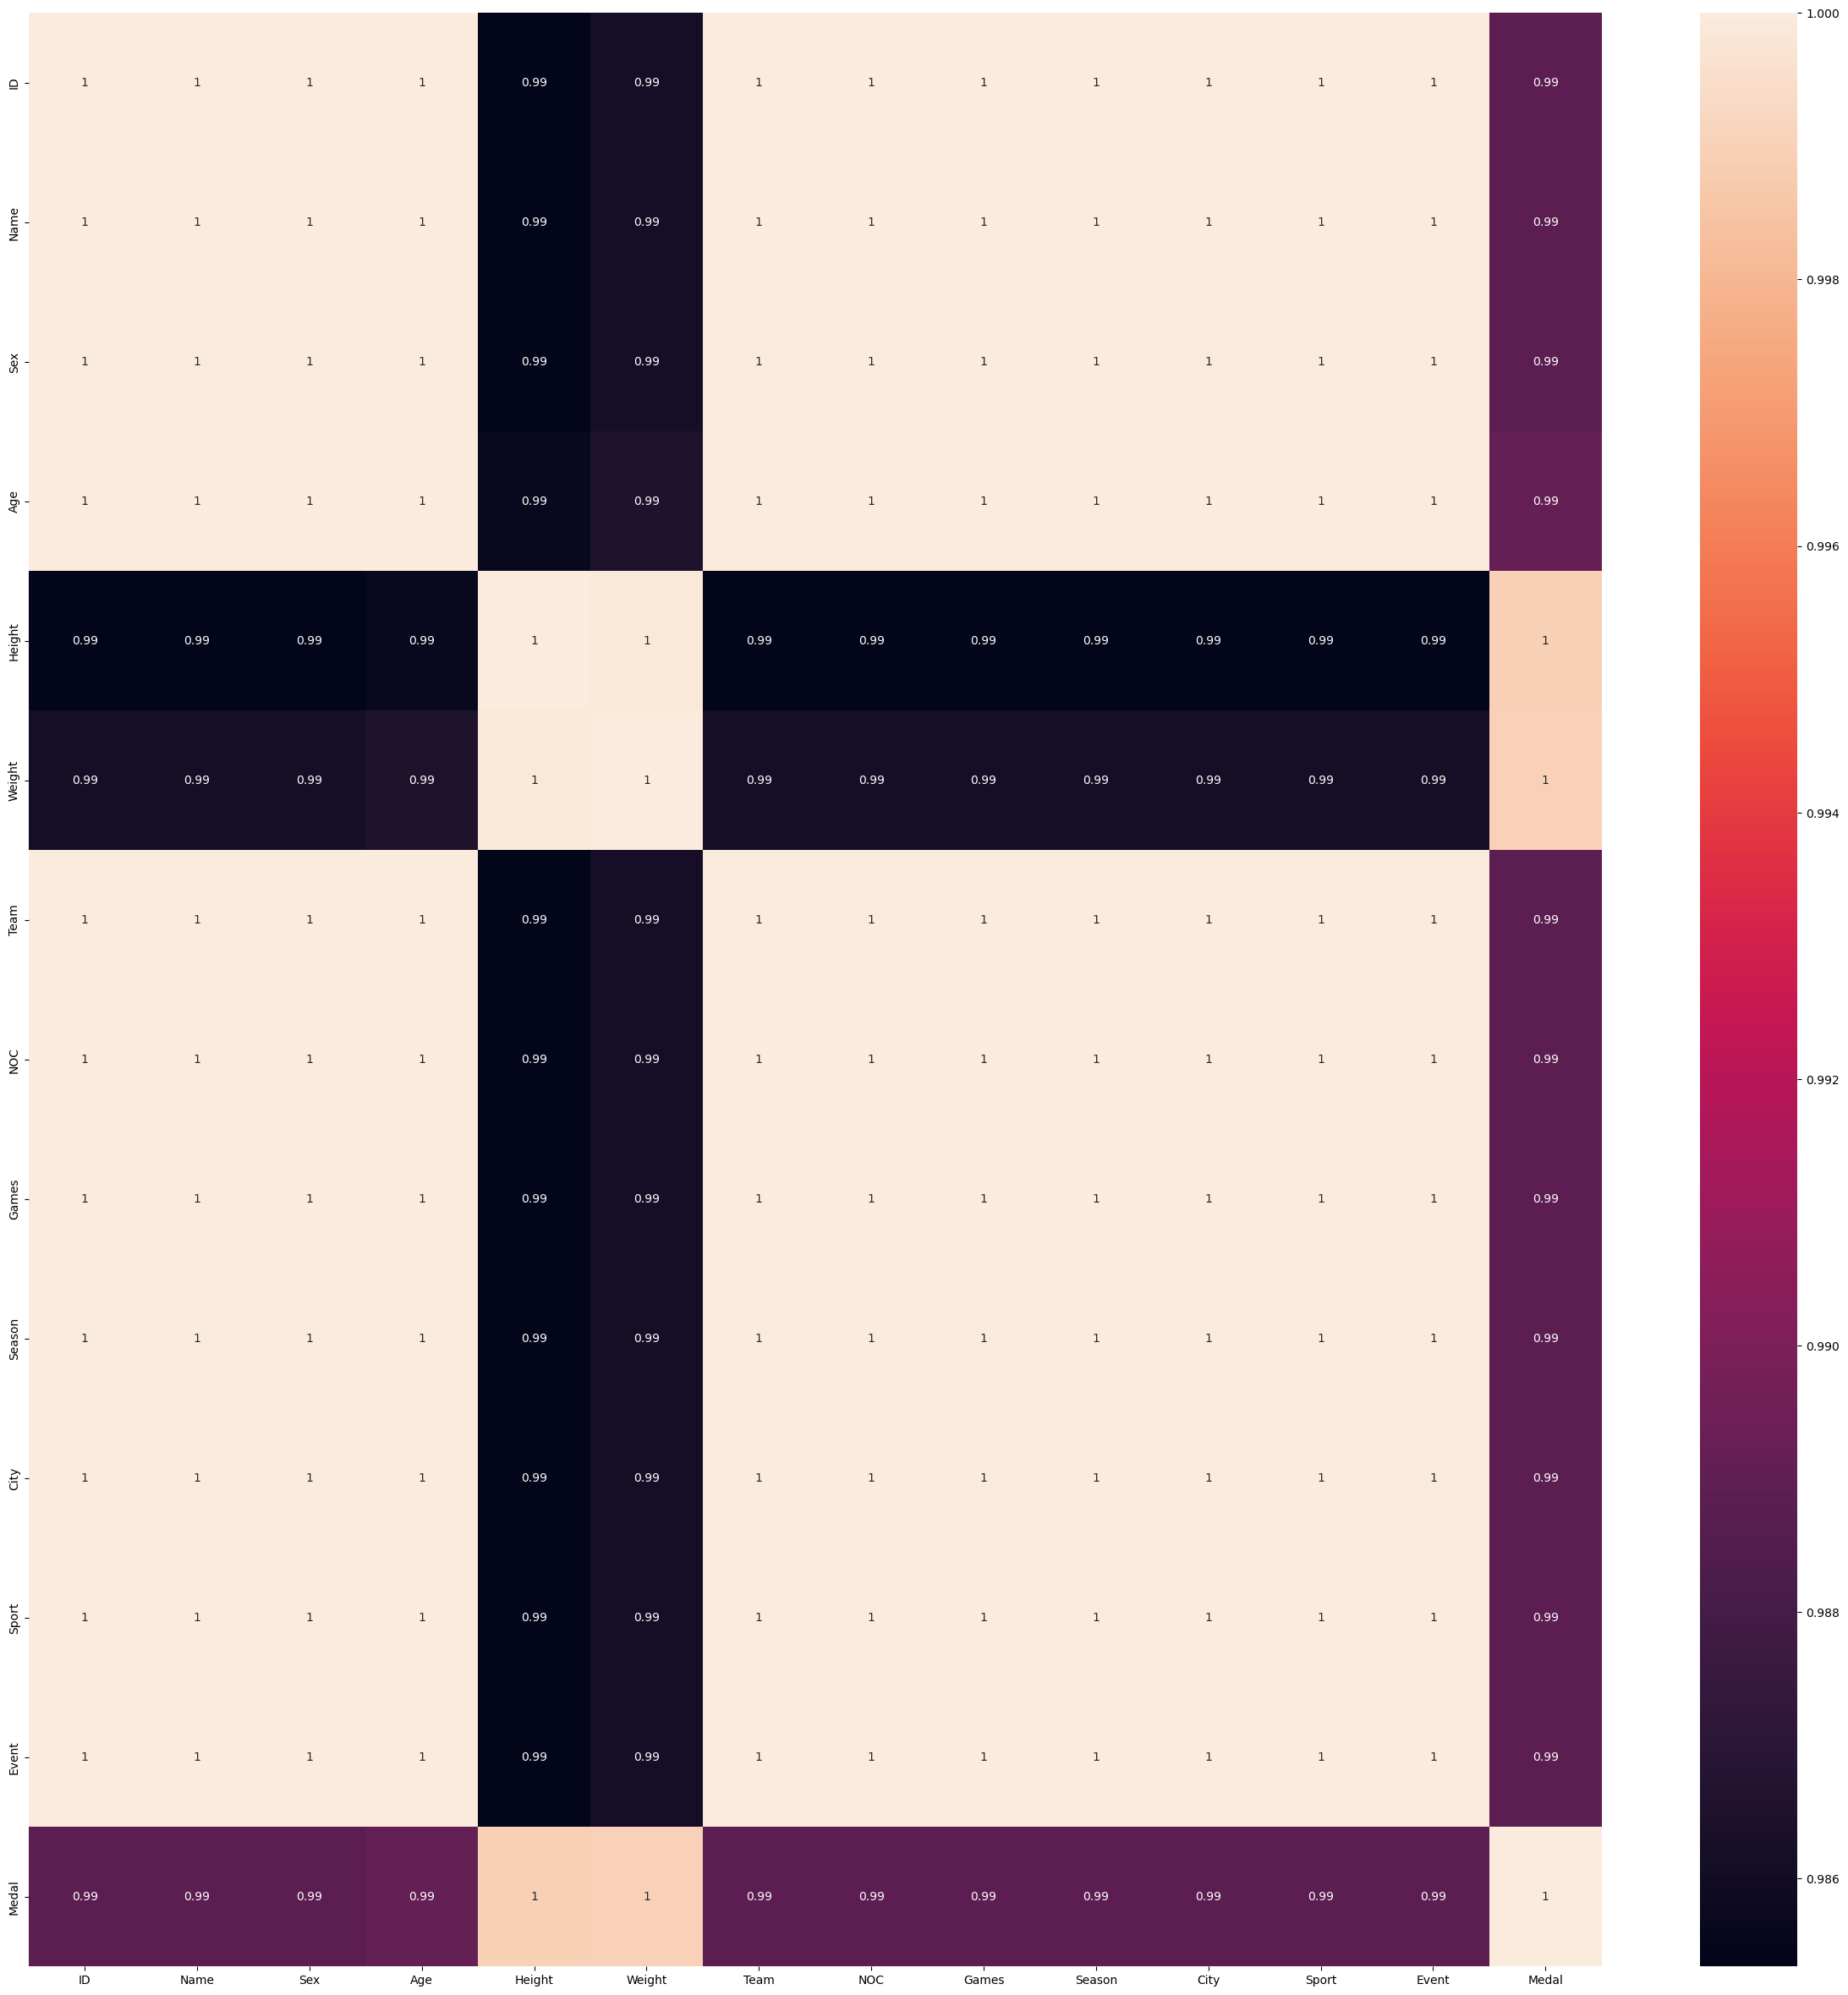

In [35]:
s = df_by_year.corr()
s[abs(s) <= 0.75] = 0

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(s, annot=True)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Team'}>,
        <AxesSubplot:title={'center':'NOC'}>],
       [<AxesSubplot:title={'center':'Games'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Sport'}>],
       [<AxesSubplot:title={'center':'Event'}>,
        <AxesSubplot:title={'center':'Medal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

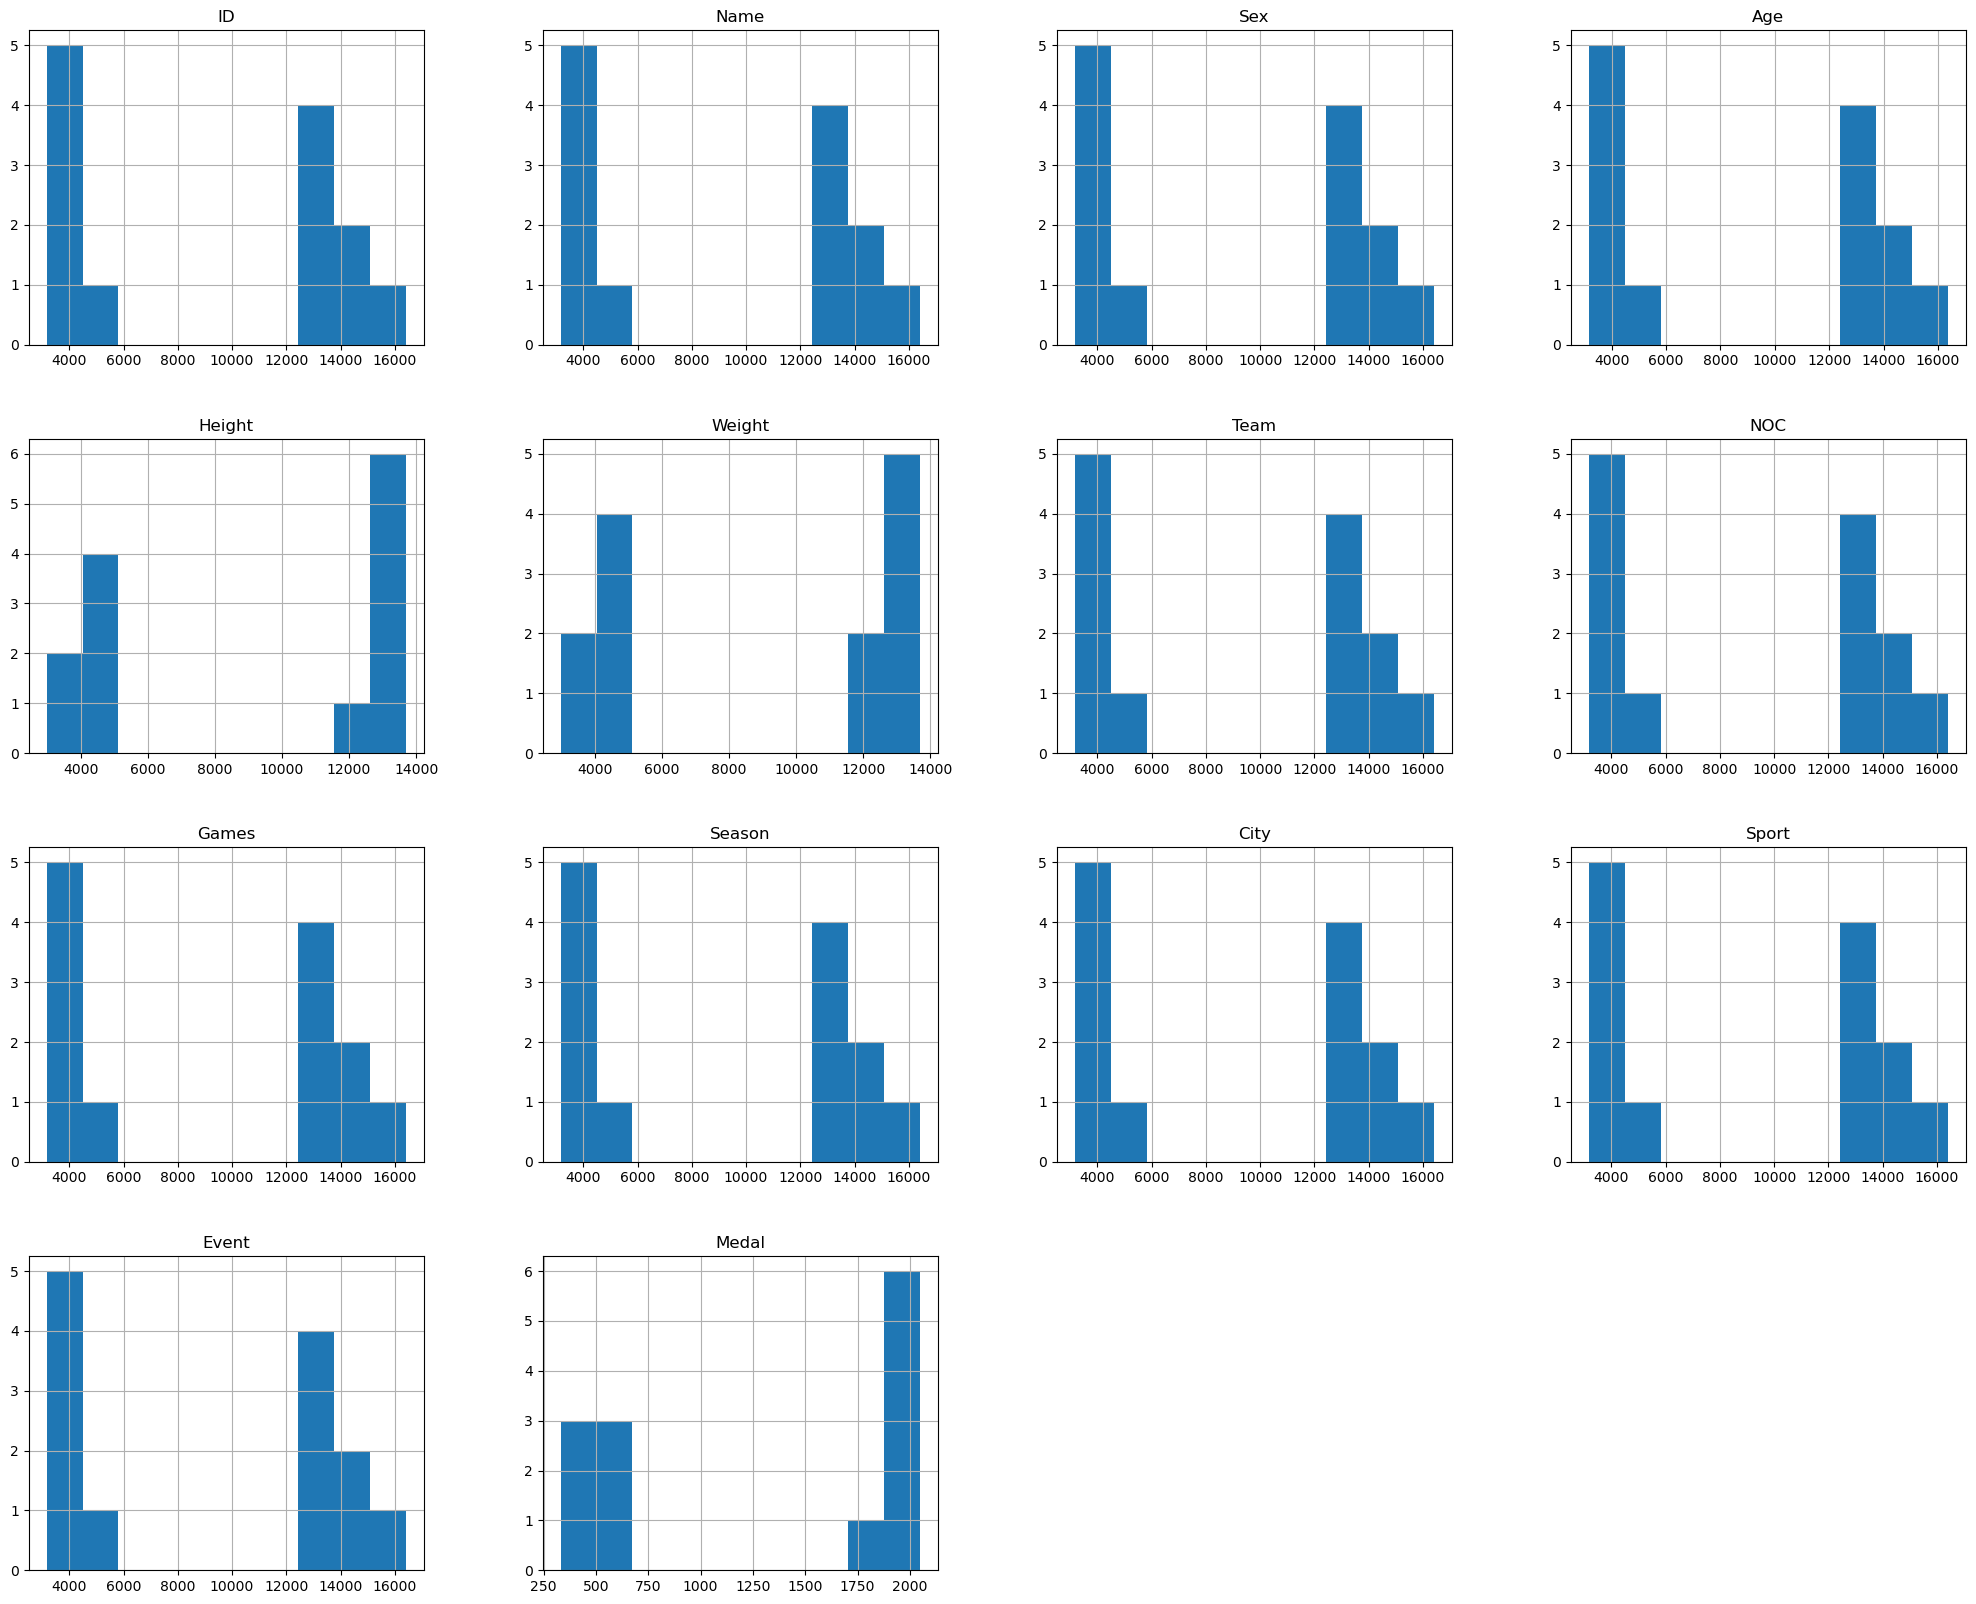

In [32]:
df_by_year.hist(figsize=(25, 20))

In [46]:
df_by_team = df.groupby('Team').agg('count').sort_values('Medal', ascending=False)

<AxesSubplot:xlabel='Team'>

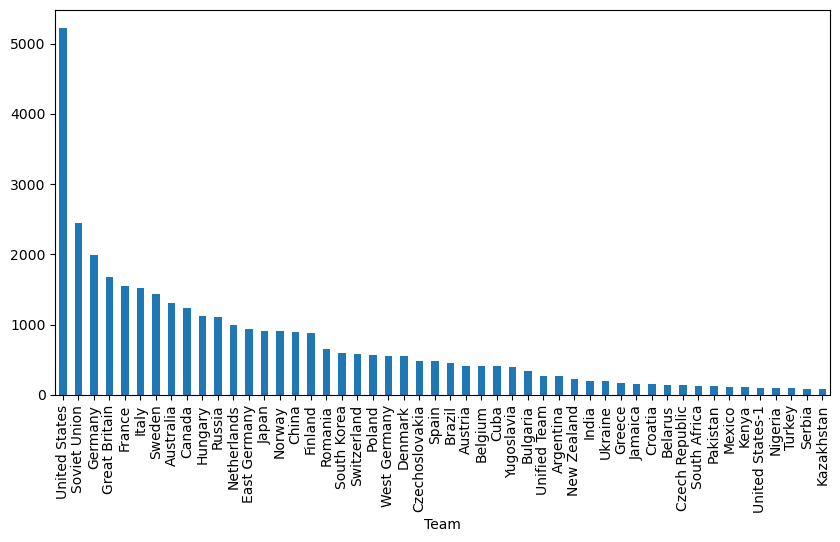

In [52]:
df_by_team['Medal'].head(50).plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='Year'>

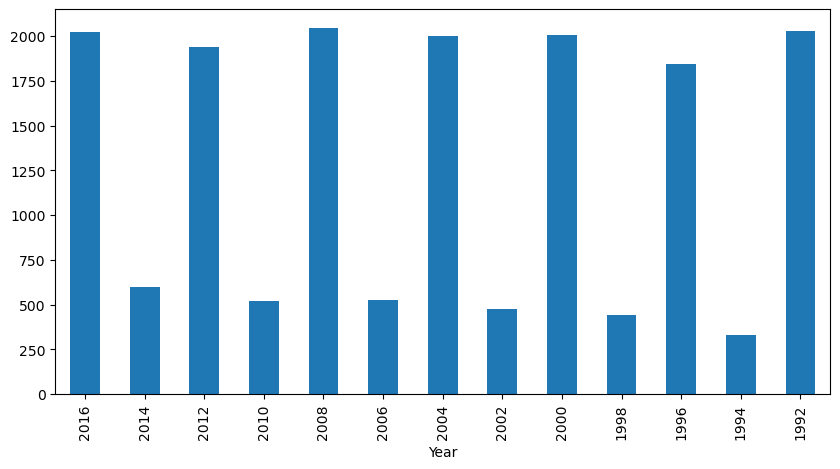

In [59]:
df_by_year['Medal'].head(50).plot.bar(figsize=(10,5))

In [60]:
df_by_season = df.groupby('Season').agg('count')

<AxesSubplot:xlabel='Season'>

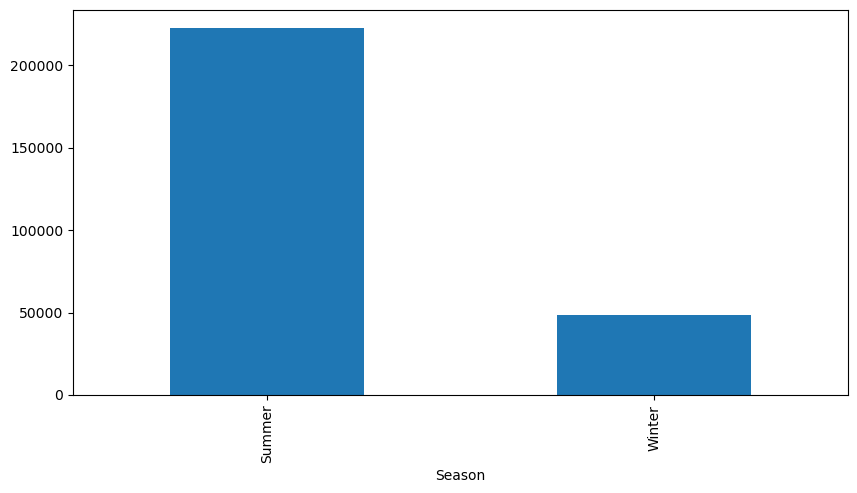

In [64]:
df_by_season['Event'].head(50).plot.bar(figsize=(10,5))